In [1]:
# Basic
import warnings
warnings.filterwarnings('ignore')

import os
from os import makedirs # make directory
from os import listdir # list directories
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import pandas as pd

# visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread # Used to read images
from PIL import Image # Image Visulization

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Loading Images in a Dataframe

In [4]:
import zipfile

train_path = "/content/drive/MyDrive/dog_and_cat/train.zip"
test_path = "/content/drive/MyDrive/dog_and_cat/test1.zip"
files = "/content/working/"

import zipfile

with zipfile.ZipFile(train_path, 'r') as zipp:
    zipp.extractall(files)

with zipfile.ZipFile(test_path, 'r') as zipp:
    zipp.extractall(files)


In [5]:
image_dir = "/content/working/train/"

filenames = os.listdir(image_dir)
labels = [x.split(".")[0] for x in filenames]

data = pd.DataFrame({"filename": filenames, "label": labels})

data.head()

,filename,label
0,cat.15.jpg,cat
1,dog.9266.jpg,dog
2,dog.3754.jpg,dog
3,dog.2213.jpg,dog
4,dog.11799.jpg,dog


In [6]:
data.shape

(25000, 2)

In [7]:
data = data[:2000]
data.shape

(2000, 2)

# Data Exploration

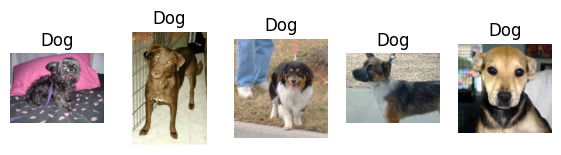

In [25]:
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)


for i in range(5):

    plt.subplot(10, 14,i+1)    # the number of images in the grid is 10*10 (100)
    filenames = '/content/working/train/' + 'dog.' + str(i) + '.jpg'
    image = imread(filenames)
    plt.imshow(image)
    plt.title('Dog',fontsize=12)
    plt.axis('off')

plt.show()

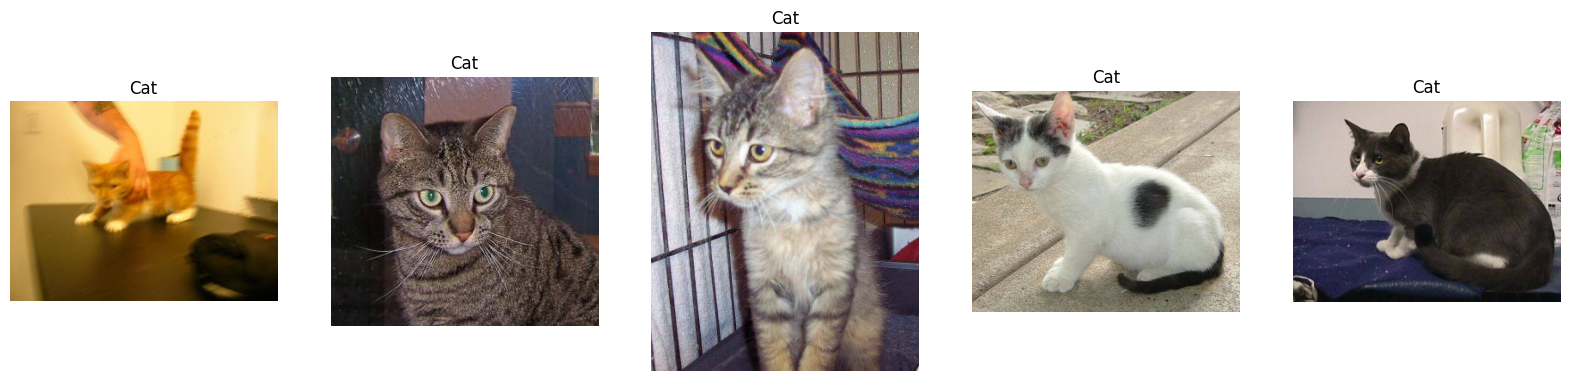

In [27]:
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)


for i in range(5):

    plt.subplot(1,5,i+1)    # the number of images in the grid is 10*10 (100)
    filename = '/content/working/train/' + 'cat.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('Cat',fontsize=12)
    plt.axis('off')

plt.show()

Images are of varying size.

Every time the cell is run different set of images will be displayed, one can scan the images of both categories. Presence of humans in some images could be a challenge for the model to classify.

Some images have more than one cats or dogs respectively.

# Train Test Split

In [10]:
# train test split using dataframe

labels = data['label']

# 20% split
# 80%.    20%
X_train, X_temp = train_test_split(data, test_size=0.2, stratify=labels, random_state = 42)

label_test_val = X_temp['label']

# 10%.   10%
X_test, X_val = train_test_split(X_temp, test_size=0.5, stratify=label_test_val, random_state = 42)

print('The shape of train data',X_train.shape)
print('The shape of test data',X_test.shape)
print('The shape of validation data',X_val.shape)

The shape of train data (1600, 2)
The shape of test data (200, 2)
The shape of validation data (200, 2)


We're doing train, test, validation split (80:10:10)

Now we will Create a barplot to see the class distrubtion in trainting dataset.

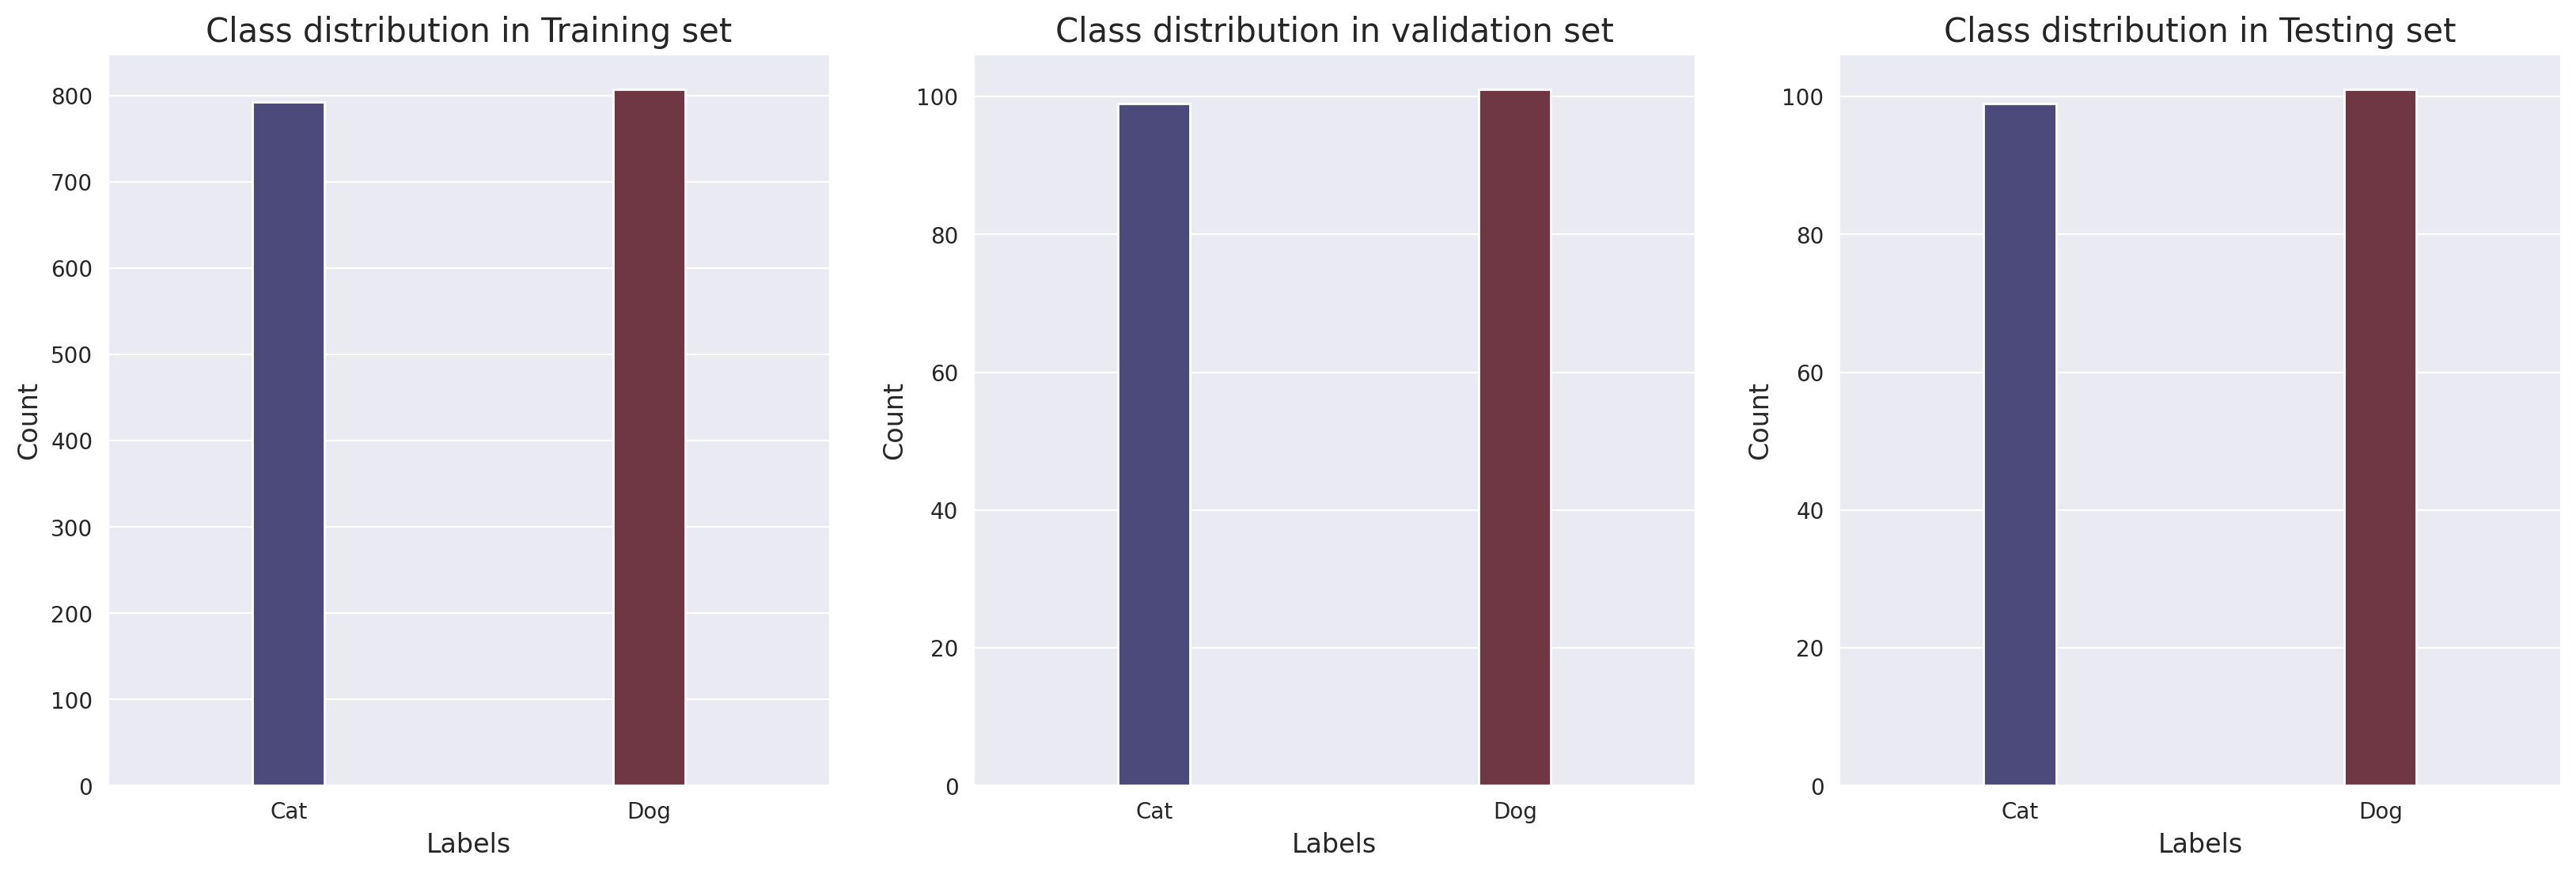

In [11]:
labels = ['Cat','Dog']

label1,count1 = np.unique(X_train.label,return_counts=True)
label2,count2 = np.unique(X_val.label,return_counts=True)
label3,count3 = np.unique(X_test.label,return_counts=True)

uni1 = pd.DataFrame(data=count1,index=labels,columns=['Count1'])
uni2 = pd.DataFrame(data=count2,index=labels,columns=['Count2'])
uni3 = pd.DataFrame(data=count3,index=labels,columns=['Count3'])


plt.figure(figsize=(20,6),dpi=200)
sns.set_style('darkgrid')

plt.subplot(131)
sns.barplot(data=uni1,x=uni1.index,y='Count1',palette='icefire',width=0.2).set_title('Class distribution in Training set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.subplot(132)
sns.barplot(data=uni2,x=uni2.index,y='Count2',palette='icefire',width=0.2).set_title('Class distribution in validation set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)


plt.subplot(133)
sns.barplot(data=uni3,x=uni3.index,y='Count3',palette='icefire',width=0.2).set_title('Class distribution in Testing set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.show()

# Using Directory

In [18]:
# create directories
dataset_home = '/content/working'
subdirs = ['train/', 'test/']

for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True) # Create 4 directories
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.2
# copy training dataset images into subdirectories
src_directory = '/content/working/train/'
for file in listdir(src_directory):
        src = src_directory + '/' + file
        dst_dir = 'train/'
        if random() < val_ratio:
            dst_dir = 'test/'
        if file.startswith('cat'):
            dst = dataset_home + dst_dir + 'cats/' + file
            copyfile(src, dst)
        elif file.startswith('dog'):
            dst = dataset_home + dst_dir + 'dogs/' + file
            copyfile(src, dst)


path1 = "/content/workingtrain/cats"
path2 = "/content/workingtrain/dogs"
path3 = "/content/workingtest/cats"
path4 = "/content/workingtest/dogs"


print('Then number of cat images in training data is' ,len(os.listdir(path1)))
print('Then number of dog images in training data is' ,len(os.listdir(path2)))
print('Then number of cat images in validation data is' ,len(os.listdir(path3)))
print('Then number of dog images in validation data is' ,len(os.listdir(path4)))


Then number of cat images in training data is 10002
Then number of dog images in training data is 9908
Then number of cat images in validation data is 2498
Then number of dog images in validation data is 2592


# Data Preparation

In [12]:
# parameters
image_size = 128 # Size of the image
image_channel = 3 # Colour scale (RGB)
bat_size = 32 # Number of files/images processed at once

In [13]:
# Creating image data generator
# Preprocess images ==> Feature Engineering for Images
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
X_val.head()

,filename,label
1038,dog.551.jpg,dog
110,cat.5319.jpg,cat
549,cat.2838.jpg,cat
512,dog.6669.jpg,dog
69,cat.9099.jpg,cat


In [20]:
# Applying image data gernerator to train and test data

train_generator = train_datagen.flow_from_dataframe(X_train,
                                                    directory = '/content/working/train/',
                                                    x_col= 'filename',
                                                    y_col= 'label',
                                                    batch_size = bat_size,
                                                    target_size = (image_size,image_size)
                                                   )
val_generator = test_datagen.flow_from_dataframe(X_val,
                                                 directory = '/content/working/train/',
                                                 x_col= 'filename',
                                                 y_col= 'label',
                                                 batch_size = bat_size,
                                                 target_size = (image_size,image_size),
                                                 shuffle=False
                                                )

test_generator = test_datagen.flow_from_dataframe(X_test,
                                                  directory = '/content/working/train/',
                                                  x_col= 'filename',
                                                  y_col= 'label',
                                                  batch_size = bat_size,
                                                  target_size = (image_size,image_size),
                                                  shuffle=False
                                                 )

Found 1600 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


In [19]:
train_gen = train_datagen.flow_from_directory('/content/workingtrain',
                                              class_mode='binary',
                                              target_size = (image_size,image_size),
                                              batch_size = bat_size,
                                             )

val_gen = test_datagen.flow_from_directory('/content/workingtest',
                                          class_mode='binary',
                                          batch_size = bat_size,
                                          target_size = (image_size,image_size),
                                          shuffle = False
                                         )

Found 19910 images belonging to 2 classes.
Found 5090 images belonging to 2 classes.


# Deep Learning Model

### Architecture

The architecture of the Cat vs Dog Image Classification model consists of the following Layers and components:

#### Layers :
* The input layer consist of a Conv2D with 32 filters and activation relu.
* The model contain the 1 block of convolution with increasing filters and activation relu.
* Each convolution block contains Batch Noramlization, Max pooling (pool_size = 2) and Dropout (0.2).
* The fully connected layers contain Flatten layer, Dense layer with 512 units and a Dropout layer.
* The output layer is a Dense layer with 2 units and softmax activation.

#### Components:

* **Input Layer:** Receives input images for classification.
* **Convolutional Layers:** Extract features from the images through convolutional operations.
* **Pooling Layers:** Reduce the spatial dimensions of the feature maps.
* **Flatten Layer:** Convert the 2D feature maps into a 1D vector.
* **Fully Connected Layers:** Perform classification using densely connected layers.
* **Output Layer:** Provides the final prediction probabilities for cat and dog classes.

In [21]:
model = Sequential()

# Input Layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (image_size,image_size,image_channel)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block 1
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


# Fully Connected layers
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer
model.add(Dense(2,activation='softmax')) # Softmax for binary classification

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        2

In [24]:
30*30*64

57600

### Callbacks

In [25]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience=2,
                                            factor=0.5,
                                            min_lr = 0.00001,
                                            verbose = 1)

early_stoping = EarlyStopping(monitor='val_loss',patience= 2,restore_best_weights=True,verbose=0)

# Compile the model

In [26]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Fit the model

We are now going to train our compiled model using the train iterator (train_generator) and use the val iterator (val_generator) as a validation dataset during training.

The number of steps for the train and validation iterators must be specified. This is the number of batches that will comprise one epoch. This can be specified via the length of each iterator, and will be the total number of images in the train and validation directories divided by the batch size (32).

The model will be fit for 10 epochs.

In [27]:
cat_dog = model.fit(train_generator,
                    validation_data = val_generator,
                    callbacks=[learning_rate_reduction],
                    epochs = 10,
                    # steps_per_epoch = len(train_generator),
                    # validation_steps = len(val_generaotor),
                   )

Epoch 1/10
50/50 [==============================] - 11s 69ms/step - loss: 0.9267 - accuracy: 0.6119 - val_loss: 1.3003 - val_accuracy: 0.4950 - lr: 0.0010
Epoch 2/10
50/50 [==============================] - 5s 91ms/step - loss: 0.5460 - accuracy: 0.7425 - val_loss: 1.1955 - val_accuracy: 0.5050 - lr: 0.0010
Epoch 3/10
50/50 [==============================] - 3s 67ms/step - loss: 0.5118 - accuracy: 0.7688 - val_loss: 1.1569 - val_accuracy: 0.4900 - lr: 0.0010
Epoch 4/10
50/50 [==============================] - 3s 64ms/step - loss: 0.4082 - accuracy: 0.8338 - val_loss: 1.1865 - val_accuracy: 0.5100 - lr: 0.0010
Epoch 5/10
50/50 [==============================] - 4s 78ms/step - loss: 0.2891 - accuracy: 0.8925 - val_loss: 2.1758 - val_accuracy: 0.5550 - lr: 0.0010
Epoch 6/10
50/50 [==============================] - 3s 62ms/step - loss: 0.2124 - accuracy: 0.9281 - val_loss: 1.7262 - val_accuracy: 0.5700 - lr: 0.0010
Epoch 7/10
50/50 [==============================] - 3s 63ms/step - loss: 0.

In [28]:
cat_dog.history

{'loss': [0.9266852736473083,
  0.5460118651390076,
  0.5117764472961426,
  0.4081762433052063,
  0.28907740116119385,
  0.21237625181674957,
  0.13098034262657166,
  0.08723949640989304,
  0.04750387743115425,
  0.050268035382032394],
 'accuracy': [0.6118749976158142,
  0.7425000071525574,
  0.768750011920929,
  0.8337500095367432,
  0.8924999833106995,
  0.9281250238418579,
  0.9637500047683716,
  0.9693750143051147,
  0.9887499809265137,
  0.987500011920929],
 'val_loss': [1.3002618551254272,
  1.1954927444458008,
  1.1569342613220215,
  1.1864975690841675,
  2.1758229732513428,
  1.7262367010116577,
  2.5059947967529297,
  2.8348941802978516,
  2.8984644412994385,
  1.7482829093933105],
 'val_accuracy': [0.4950000047683716,
  0.5049999952316284,
  0.49000000953674316,
  0.5099999904632568,
  0.5550000071525574,
  0.5699999928474426,
  0.5149999856948853,
  0.5950000286102295,
  0.6349999904632568,
  0.5649999976158142],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001

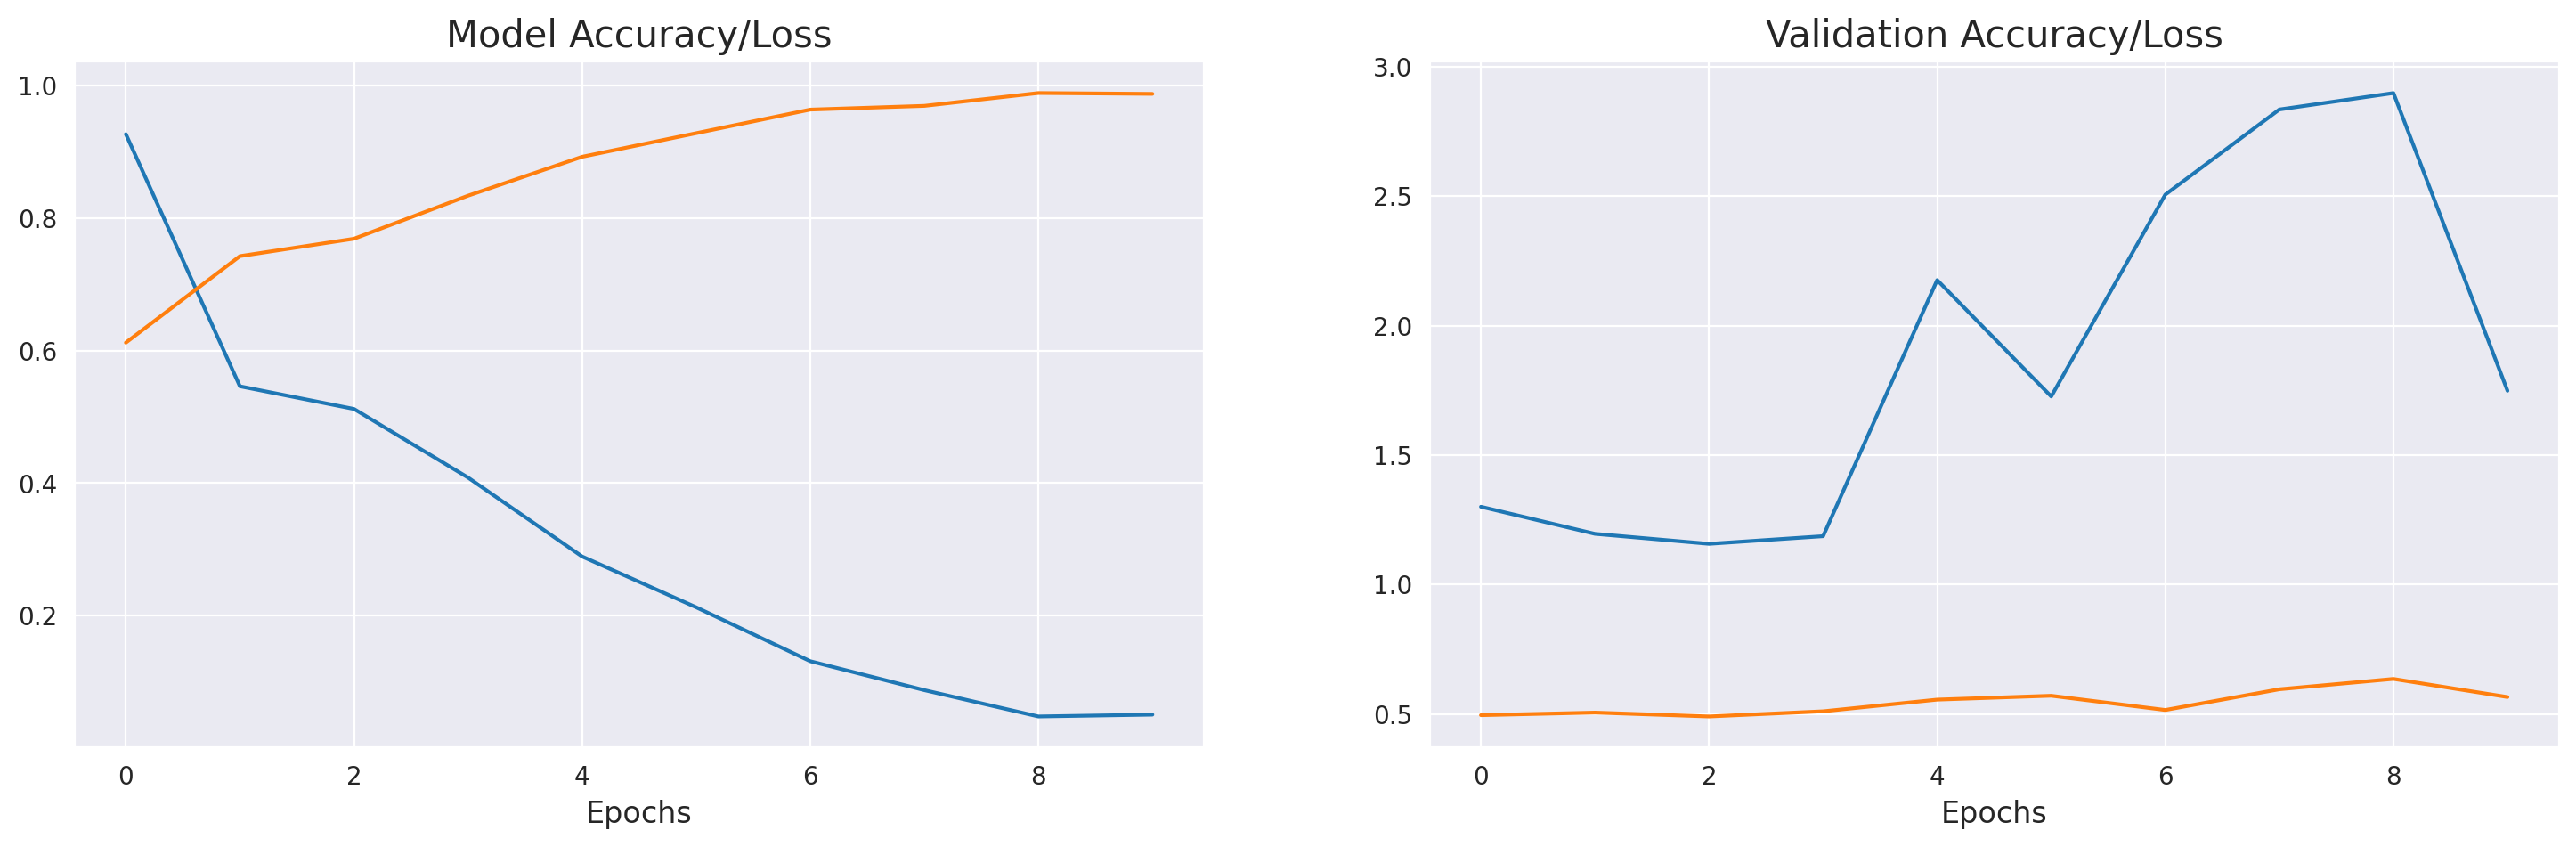

In [29]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(cat_dog.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Model Accuracy/Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['accuracy'])

plt.subplot(122)
plt.title('Validation Accuracy/Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.plot(error['val_loss'])
plt.plot(error['val_accuracy'])

plt.show()

Evaluvation

we will evaluvate the Training and validation data accuracy and loss.

In [30]:
# Evaluate for train generator
loss,acc = model.evaluate(train_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(val_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 78.25000286102295
The Loss of the model for training data is: 0.5300825238227844
The accuracy of the model for validation data is: 56.49999976158142
The Loss of the model for validation data is: 1.7482829093933105


Finally, we will save the model for future use.

In [31]:
# Save the Model
model.save("model.h5")

# Prediction



In [32]:
# prediction
result = model.predict(test_generator,batch_size = bat_size,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

# Evaluate
loss,acc = model.evaluate(test_generator, batch_size = bat_size, verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

The accuracy of the model for testing data is: 57.999998331069946
The Loss of the model for testing data is: 1.5472075939178467


Classification report

In [33]:
labels =['Cat','Dog']
print(classification_report(y_true, y_pred,target_names=labels))

              precision    recall  f1-score   support

         Cat       0.54      0.95      0.69        99
         Dog       0.81      0.22      0.34       101

    accuracy                           0.58       200
   macro avg       0.68      0.58      0.52       200
weighted avg       0.68      0.58      0.52       200



confusioin matrix

In [34]:
import cv2

def pred_single(path):
    img = imread(path)

    resized_image = cv2.resize(img, (image_size, image_size))
    resized_image = np.expand_dims(resized_image, axis=0)  # Add batch dimension
    rescaled_image = resized_image / 255.0  # Normalize pixel values to [0, 1]

    # Make predictions
    predictions = model.predict(rescaled_image)

    # Assuming you have binary classification, extract the class with the highest probability
    predicted_class = np.argmax(predictions)

    if predicted_class == 0:
        pred = 'cat'
    else:
        pred='dog'

    return [img, pred]

In [35]:
import zipfile

data_test_predict = "/content/drive/MyDrive/dog_and_cat/PetImages.zip"

data_dog_cat = "/content/data/"

import zipfile
with zipfile.ZipFile(data_test_predict, 'r') as zipp:
    zipp.extractall(data_dog_cat)


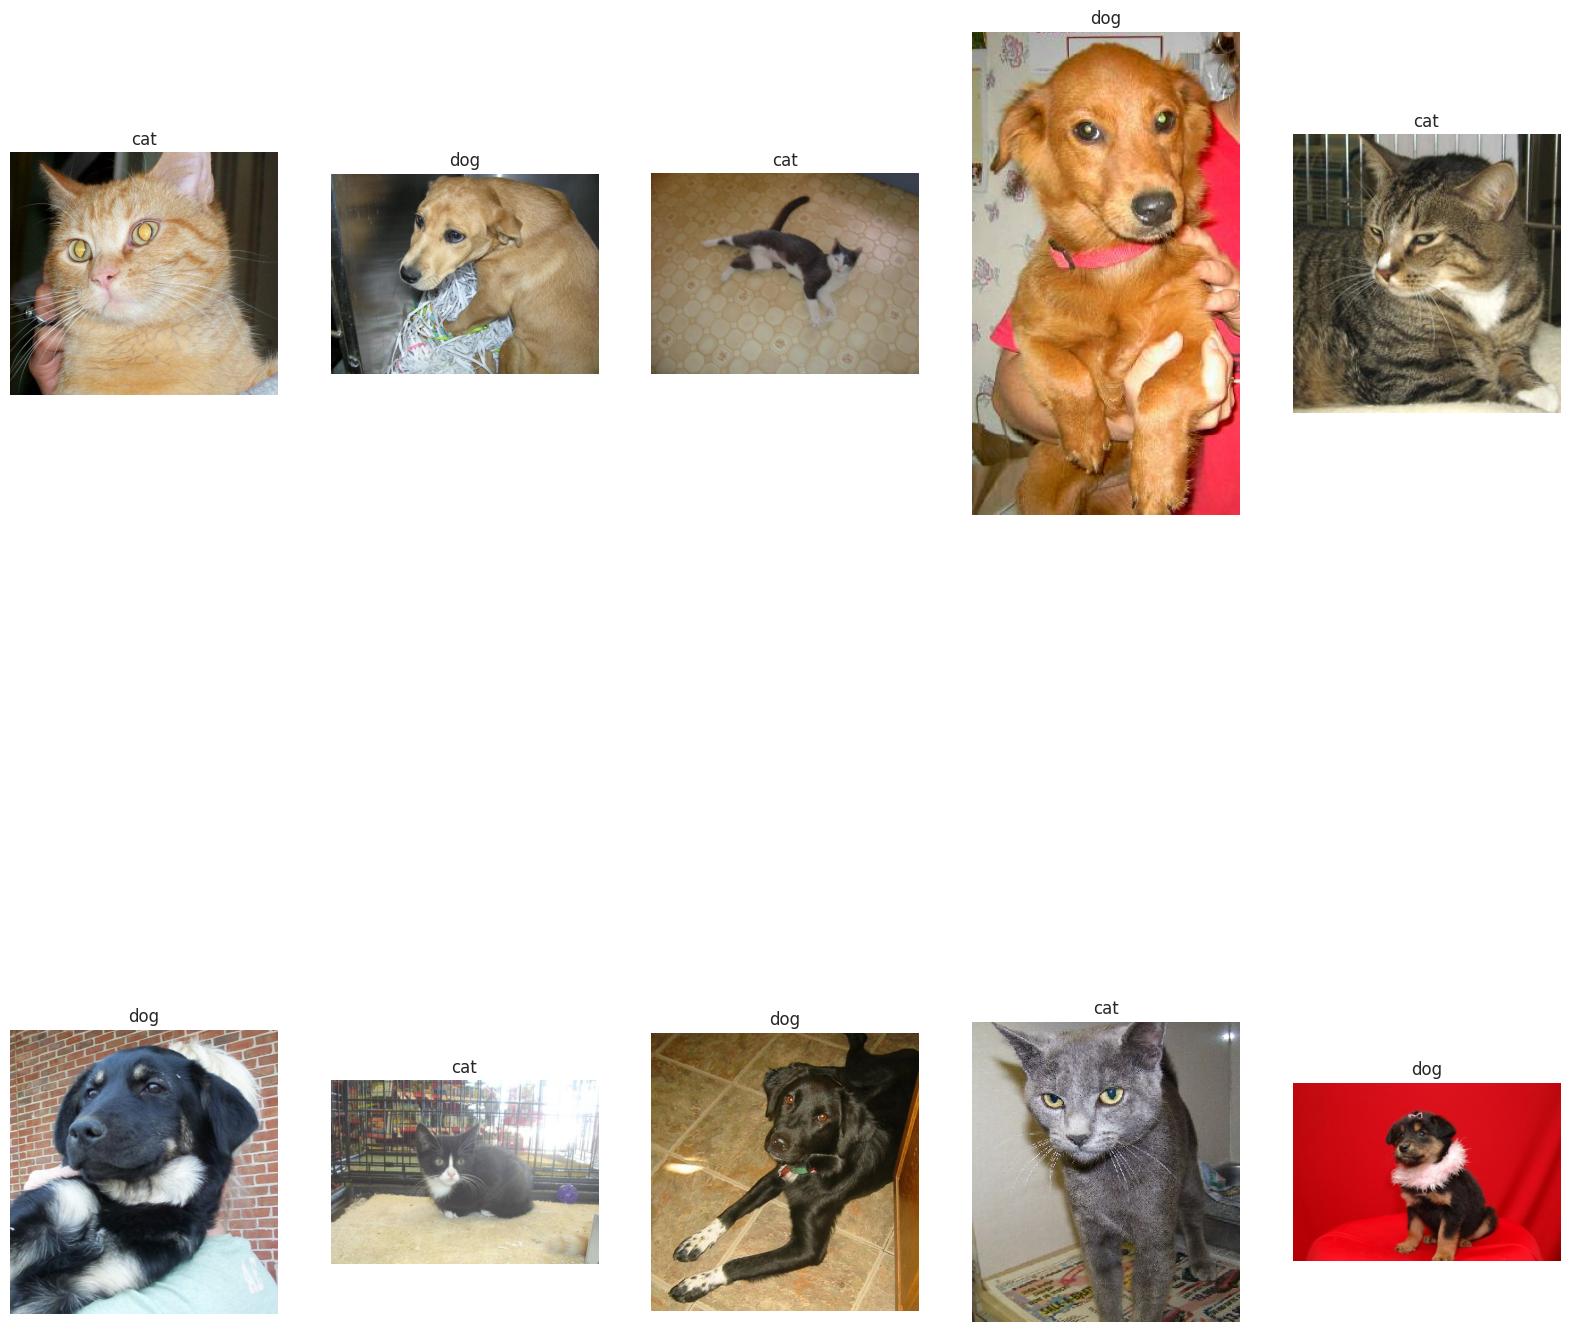

In [40]:
import random
import os
import matplotlib.pyplot as plt

cat_path = '/content/data/PetImages/Cat'
dog_path = '/content/data/PetImages/Dog'

cat_files = os.listdir(cat_path)
dog_files = os.listdir(dog_path)


def pred_single(img_path):
    from PIL import Image
    img = Image.open(img_path)
    label = "cat" if "Cat" in img_path else "dog"
    return (img, label)

imgs = []
preds = []

for _ in range(5):
    img_path_cat = os.path.join(cat_path, random.choice(cat_files))
    img_path_dog = os.path.join(dog_path, random.choice(dog_files))

    #cat
    cat_output = pred_single(img_path_cat)
    imgs.append(cat_output[0])
    preds.append(cat_output[1])

    #dog predict
    dog_output = pred_single(img_path_dog)
    imgs.append(dog_output[0])
    preds.append(dog_output[1])


plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.4)

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(imgs[i])
    plt.title(f'{preds[i]}', fontsize=12)
    plt.axis('off')

plt.show()


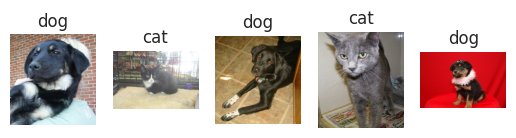

In [41]:
for i in range(5):

    plt.subplot(1, 5,i+1)    # the number of images in the grid is 10*10 (100)
    plt.imshow(imgs[i+5])
    plt.title(f'{preds[i+5]}',fontsize=12)
    plt.axis('off')

plt.show()

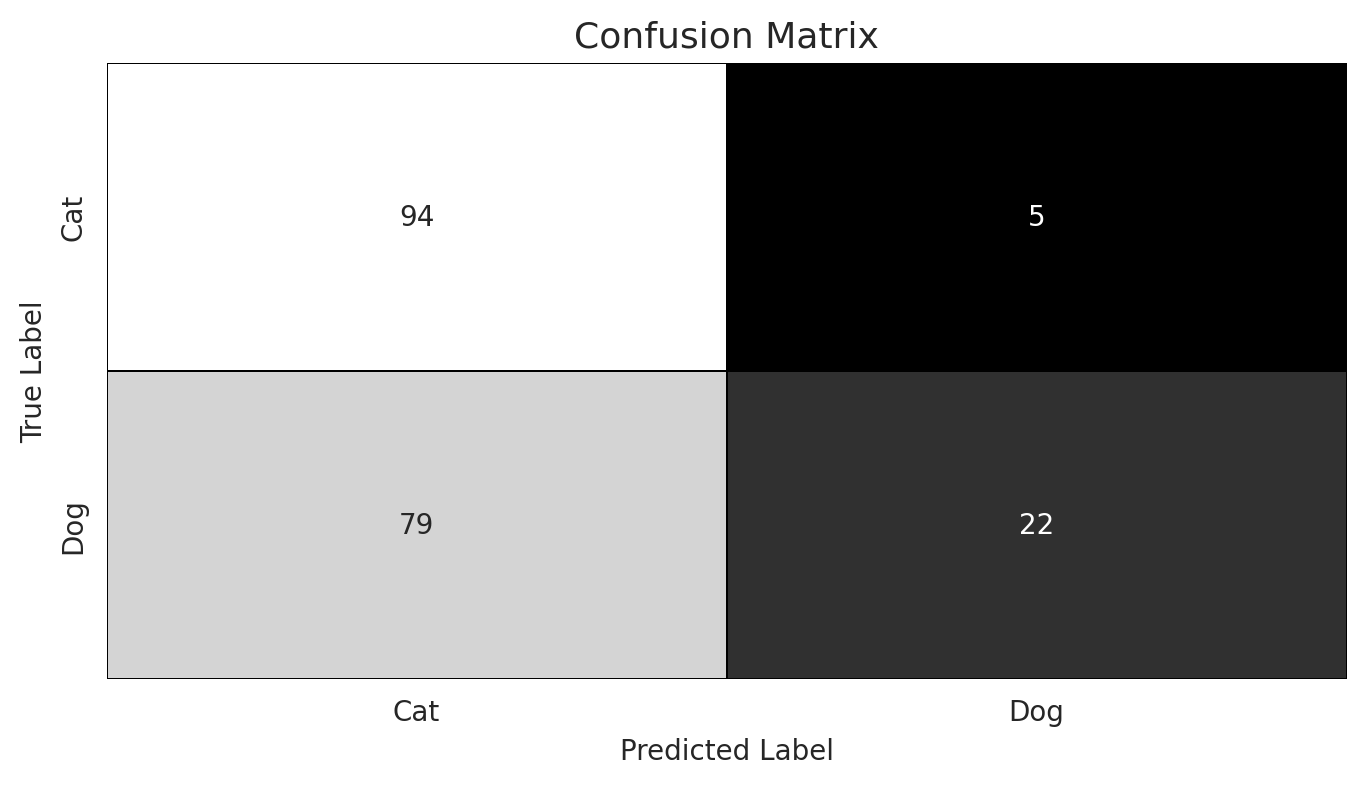

In [42]:
confusion_mtx = confusion_matrix(y_true,y_pred)

f,ax = plt.subplots(figsize = (8,4),dpi=200)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax,cbar=False, xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label",fontsize=10)
plt.ylabel("True Label",fontsize=10)
plt.title("Confusion Matrix",fontsize=13)

plt.show()